In [40]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [42]:
print("Data is available on the following stocks:\n AAPL\n BA\n T\n MGM\n AMZN\n IBM\n TSLA\n GOOG\n sp500\n ")
stock_name = input("Enter stock name to predict:")

Data is available on the following stocks:
 AAPL
 BA
 T
 MGM
 AMZN
 IBM
 TSLA
 GOOG
 sp500
 
Enter stock name to predict:BA


In [43]:
stock_price_df = pd.read_csv('/content/drive/My Drive/stock.csv')

In [44]:
stock_vol_df = pd.read_csv("/content/drive/My Drive/stock_volume.csv")

In [45]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])

In [46]:
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])

In [47]:
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [48]:
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [49]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [50]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [51]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x
  

In [52]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [53]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

In [54]:
  # Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [55]:
# Function to return the input/output (target) data for AI/ML Model

# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [56]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, f'{stock_name}')

In [57]:
price_volume_target_df = trading_window(price_volume_df)

In [58]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]

In [59]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [60]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [61]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [79]:
# Spliting the data this way, since order is important in time-series

split = int(0.85 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

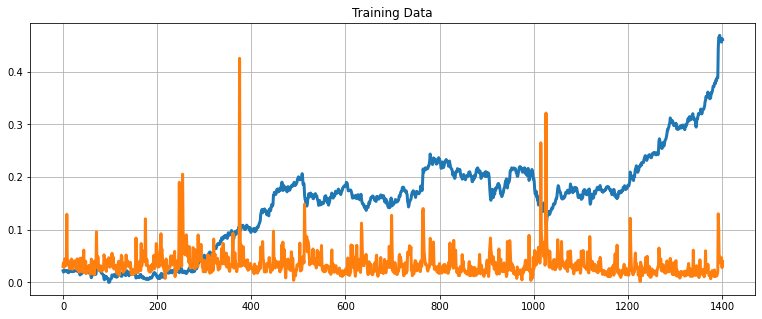

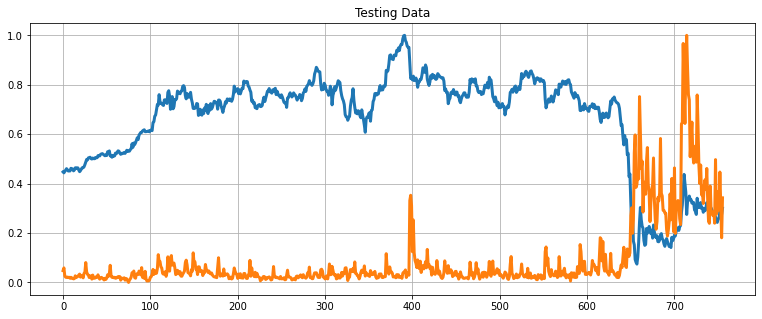

In [63]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [64]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, f'{stock_name}')
price_volume_df

,Date,Close,Volume
0,2012-01-12,75.510002,3934500
1,2012-01-13,74.599998,4641100
2,2012-01-17,75.239998,3700100
3,2012-01-18,75.059998,4189500
4,2012-01-19,75.559998,5397300
...,...,...,...
2154,2020-08-05,174.279999,46551000
2155,2020-08-06,172.199997,32921600
2156,2020-08-07,170.020004,19301600
2157,2020-08-10,179.410004,35857700


In [65]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[7.55100020e+01, 3.93450000e+06],
       [7.45999980e+01, 4.64110000e+06],
       [7.52399980e+01, 3.70010000e+06],
       ...,
       [1.70020004e+02, 1.93016000e+07],
       [1.79410004e+02, 3.58577000e+07],
       [1.80130005e+02, 6.09669000e+07]])

In [66]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [67]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [68]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [69]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [70]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [31]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                

In [71]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 0s 8ms/step - loss: 8.4624e-05 - val_loss: 8.9985e-05
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0189e-04 - val_loss: 1.8356e-04
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 7.1732e-05 - val_loss: 6.8449e-05
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 7.0803e-05 - val_loss: 7.3021e-05
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 6.1459e-05 - val_loss: 8.7816e-05
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 6.3043e-05 - val_loss: 1.4791e-04
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 6.2235e-05 - val_loss: 5.9820e-05
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 6.0815e-05 - val_loss: 8.6365e-05
Epoch 9/20
38/38 [==============================] - 0s 8ms/step - loss: 6.3688e-05 - val_loss: 1.4868e-04
Epoch 10/20
38/38 [===========================

In [72]:
# Make prediction
predicted = model.predict(X)

In [73]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [74]:
df_predicted = price_volume_df[1:][['Date']]

In [75]:
df_predicted['predictions'] = test_predicted

In [76]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [77]:
df_predicted['Close'] = close[1:]

In [80]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")